#### Compass Generation

This file is where we pulled the SQL data and used the coordinates to generate Political Compasses.

The function generate_compass was written by Rylan Vachon

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

C:\Users\eaesp\AppData\Local\Temp\ipykernel_12384\3912084193.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### SQL

In [2]:
def get_coordinates_through_sql(database, query):
    conn = sqlite3.connect(database)
    c = conn.cursor()

    c.execute(query)
    coordinates = c.fetchall()
    
    return coordinates

In [3]:
query = ''' SELECT x_coordinate, y_coordinate
            FROM coordinates
            WHERE country = 'IE'
'''
points = get_coordinates_through_sql('tweets.db',query)

#### Compass Generation

In [4]:
def generate_compass(points, title):
    
    fig, ax = plt.subplots(layout='constrained')
    
    ax.set_axisbelow(True)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.grid(visible=True, linewidth=3, color='#a1a1a1')
    ax.set(xlim=(-10,10), xticks=np.arange(-10,11),
        ylim=(-10,10), yticks=np.arange(-10,11))
    ax.fill_between([-10,0],-10,0,alpha=0.7, color='#98ed96') #GREEN
    ax.fill_between([0,10],-10,0,alpha=0.7, color='#bf9aed') #PURPLE
    ax.fill_between([-10,0],0,10,alpha=0.7, color='#fe7475') #RED
    ax.fill_between([0,10],0,10,alpha=0.7, color='#42aaff') #BLUE
    ax.set_title(title)

    for point in points:
        x, y = point
        ax.scatter(x, y, s=100, color='#e3c51e',marker='*', linewidths=.5, edgecolors= '#000000')
        ax.annotate(('  '+str((x,y))), (x,y))
        ax.set_aspect('equal')
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    plt.show()

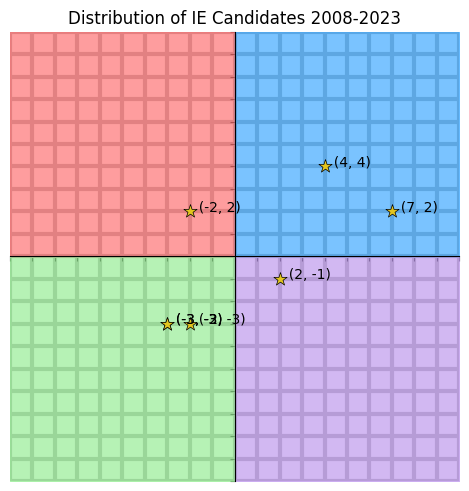

In [5]:
generate_compass(points, 'Distribution of IE Candidates 2008-2023')